## Where are Regular Expressions used?

REs are used to match patterns inside a text. A match for a pattern inside a text is called
instance for a pattern or instance for short.

## \ (back slash) character and Escape Sequences in regular strings

The discussion in this section concerns the regular strings, not the raw strings.

In [ ]:
'\n'  # denotes/indicates a newline character

In [ ]:
'\t'  # indicates a tab character

note that \n & \t are considered a single character

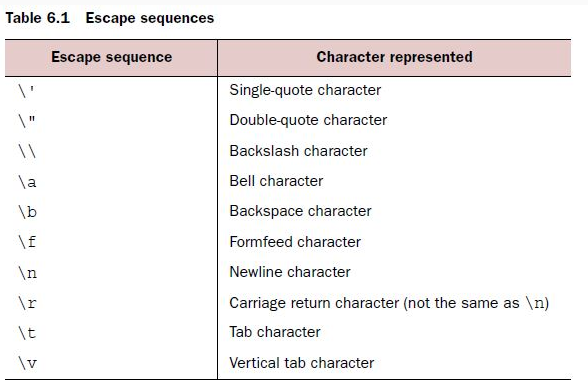

**Table 1**: Escape Sequences Used In Regular Strings In Python

Python uses ASCII character set to represent each and every character (i.e. including the escape sequences) in a given regular string:

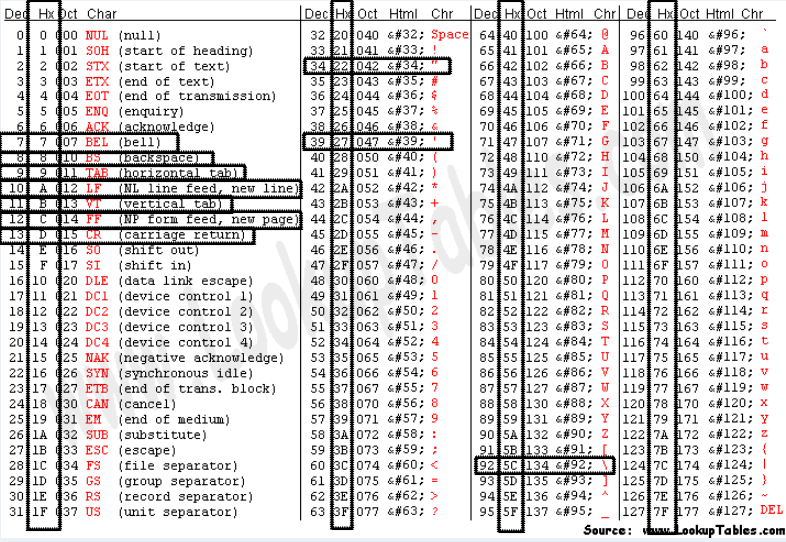

**Table 2:** ASCII character (horizontal black rectangles indicate escape sequences in Table 1)

All the Hx (i.e. Hexadecimal) values are preceeded by **\x** to represent the corresponding character.
For example, in order to represent the letter **m**, we need to either write **\x6D** or **m** in a rgular string:

In [3]:
'm'

'm'

In [4]:
'\x6D'

'm'

## Python's Transformation For Regular Strings : Outcome is a transformed string

In [2]:
'\x5C'  # for the escape sequence  \\, refer to Table 1 and Table 2
# call repr and get the formal string representation of the numeric escape sequence 5C
# 5C maps to \ character acc.to Table 2

'\\'

Referring to the previous example, in a regular string, every escape sequence (i.e. Python's special characters) has its own hexadecimal ASCII value and the escape sequence (Table 1) can be represented with hexadecimal escape sequence (i.e. \x5C) containing the hex ASCII value (i.e. 5C).

Referring to Table 1 and Table 2, lets form a string containing hex escape sequence of all the Python's special
characters:

In [17]:
# evaluating the string by simply providing the string. Note that there is no print() here
'\'\"\\\a\b\f\n\r\t\v'  # each escape sequence will be evaluated to numeric escape sequences

'\'"\\\x07\x08\x0c\n\r\t\x0b'

When Python notices that given string does not start with r or R, it concludes that the string being a regular string.

Python evaluates the regular strings, by replacing the escape sequences (i.e. Python's special characters)
with their hexadecimal escape sequence counterparts. That means, \ is treated as a special character triggering the replacement of escape sequences (Table 1) with their hex escape sequence counterparts (Table 2)

In [8]:
# evaluating the string by simply providing the string. Note that there is no print() here 
'\x27\x22\x5C\x07\x08\x0C\x0A\x0D\x09\x0B'

'\'"\\\x07\x08\x0c\n\r\t\x0b'

## r string : raw string

r in front of a string is called r expression. It voids Python's special characters (i.e. Table 1- Escape Sequences)

In [12]:
r'\n' # means it is a raw string with two characters as opposed to just one newline character

'\\n'

The above expression says "evaluate the r-string into a regular string".

When Python sees an r string, it **does not** replace the escape sequences in it.
Since the outcome has to be a regular string, two \\ are used in the regular string output to indicate a single \ in a raw string. So, in the evaluated output, all backslash characters are escaped. On the countrary, if the string is a regular one, then Python **replaces** all escape sequences with their numeric escape sequence counterparts.

Python evaluates the r strings to a regular string by escaping all backslashes (i.e. by adding a backslash in front of every backslash in the r-string):

In [19]:
# evaluating the string by simply providing the string. Note that there is no print() here
r'\x27\x22\x5C\x07\x08\x0C\x0A\x0D\x09\x0B'

'\\x27\\x22\\x5C\\x07\\x08\\x0C\\x0A\\x0D\\x09\\x0B'

Referring to above example, we provided Python an r string and 
we got back a regular string as an evaluation result. In the evaluated result, Python escaped all
backspace characters are replaced with **\\\\** escape sequence (acc.to Table 1).

In [11]:
'\\x27\\x22\\x5C\\x07\\x08\\x0C\\x0A\\x0D\\x09\\x0B'

'\\x27\\x22\\x5C\\x07\\x08\\x0C\\x0A\\x0D\\x09\\x0B'

In the above example, Python notices this is a regular string. It notices **\\\\** (i.e. escape backspace) and escapes the backspace itself as well in its evaluated regular string output.

# re.search(pattern, string) or re.findall(pattern, string)

In Figure 1, if string is a regular string, then again the escape-codes are **replaced** by the Python interpreter and then the resulting string is the one that is used by re parser to look for pattern instances. If string is a raw one, then Python interpreter directly passes it to the re parser.

Below given the flowchart:

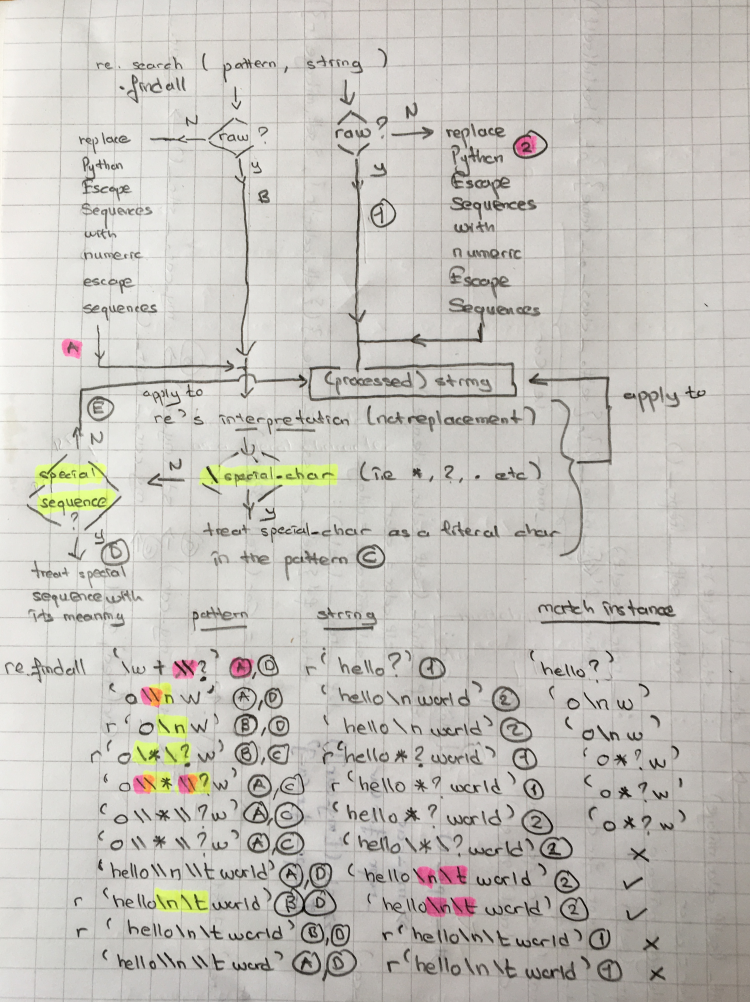

**Figure 1** - The flowchart of how re.findall and re.search work

## Raw String : Some examples

Referring to Figure 1, lets give some examples on re.search()

In [2]:
import re

result = re.search('n', r'\n')  # first argument is the re, the second item is the Python string
print(result)

# the same as above
result = re.search('n', '\\n')
print(result)

result = re.search(r'n', r'\n')
print(result)

result = re.search(r'n', '\n')
print(result)


result = re.search('n', '\n')
print(result)

<re.Match object; span=(1, 2), match='n'>
<re.Match object; span=(1, 2), match='n'>
<re.Match object; span=(1, 2), match='n'>
None
None


In [5]:
result = re.search('n', '\n\n\n\n')  # String argument contains 4 newline characters (i.e. \n is a newline char)
print(result)

None


In [4]:
result = re.search('\n', '\n\n\n\n')  # String argument contains 4 newline characters (i.e. \n is a newline char)
print(result)

<re.Match object; span=(0, 1), match='\n'>


In [3]:
result = re.search('n', r'\n\n\n\n')  # (3) String argument contains 4 literal \ and n with no special meaning
print(result)

<re.Match object; span=(1, 2), match='n'>


In [7]:
result = re.search('n', '\\n\\n\\n\\n')  # The same as (3). String argument contains 4 literal \\ and n
print(result)

<re.Match object; span=(1, 2), match='n'>


## REs and its special characters

As mentioned in Figure 1, in **re.search(RE, string_to_search)** method call,
RE parser interprets its own special sequences.

One example is RE with '\n' and r'\n' both look for newlines:

In [8]:
result = re.search('\n', '\n\n\n')  # note there is a match starting at index 0 and ending in index 1
print(result)

<re.Match object; span=(0, 1), match='\n'>


In [10]:
result = re.search(r'\n', '\n\n\n')
print(result)

<re.Match object; span=(0, 1), match='\n'>


In the example above raw expression r'\n' is passed to search() 
which then finds its own special newline character from the raw expression. Then it looks for the newline character in string_to_search '\n\n\n'.

In [9]:
# RE: r'\n' is passed to search() with \ and n characters as literal characters
# search() interpreted the \ + n as a newline

# string_to_search: r'\n\n\n' : does not contain any newline character, since it is raw,
# Python passed to search() three literal \ followed by n.
result = re.search(r'\n', r'\n\n\n')
print(result)

None


## re.match() and re.search()

In [ ]:
re.search(pattern, string, flags)
# searches anywhere within string
# flags specify special options (i.e. ignore case etc)
# returns the first pattern instance in the string
# works with multiline strings

In [ ]:
re.match(pattern, string, flags)
# searches only the beginning of the string
# does not work with multiline strings

In [ ]:
re.match('c','abcdefc')  # None

In [12]:
re.search('c', 'abcdefc') # tells you where it matched the first and only the first

<re.Match object; span=(2, 3), match='c'>

In [13]:
re.search('c','abcdefc')  # multiple c's first instance only

<re.Match object; span=(2, 3), match='c'>

In [14]:
re.match('a','abcdef') # searches only the beginning of the string

<re.Match object; span=(0, 1), match='a'>

In [15]:
# multiline string works with re.search()
result = re.search('c', 'abdef\nc')
print(result)

# multiline string does NOT work with re.match()
result = re.match('c', 'abdef\nc')
print(result)

<re.Match object; span=(6, 7), match='c'>
None


## Printing the output of re.match() and re.search()

In [17]:
re.match('a','abcdef').group() # string output, default arg is 0

'a'

In [18]:
re.match('a','abcdef').group(0)

'a'

In [19]:
re.search('n', 'abcdefnc abcd').group()

'n'

In [20]:
# pull out different types of strings depending on the pattern
re.search('n.+', 'abcdefnc abcd').group()

'nc abcd'

## Getting start & end indexes of a matching string of a given pattern

Referring to the previous example:

In [21]:
# pull out different types of strings depending on the pattern
re.search('n.+', 'abcdefnc abcd').group()

'nc abcd'

In [22]:
# pull out different types of strings depending on the pattern
re.search('n.+', 'abcdefnc abcd').start()

6

In [23]:
re.search('n.+', 'abcdefnc abcd').end()

13

For example, you can use end()+1 to search for the next match and so on.

## Literal Matching

In [24]:
# pattern = 'na'; n followed by a must be matched in string
re.search('na', 'abcdefnc abcd')  # None

In [25]:
# pattern = 'n|a'; n or a must be matched
re.search('n|a', 'abcdefnc abcd')  # n or a must be matched

<re.Match object; span=(0, 1), match='a'>

In [26]:
re.search('n|a|b', 'bcdefnc abcda') # as many OR expressions

<re.Match object; span=(0, 1), match='b'>

## re.findall()

In [27]:
re.findall('n|a', 'bcdefnc abcda')  # findall() pulls out all instances

['n', 'a', 'a']

in comparison with re.search() which pulls out only the first instance

In [28]:
re.search('n|a', 'bcdefnc abcda')

<re.Match object; span=(5, 6), match='n'>

## What is a character set? (in a RE)

Character sets contain characters to look for (i.e. [a-zA-Z0-9_])

## What is a meta character (in a RE)?

A meta character represents a character set on its own.
Referring to the previous example ***\w*** metacharacter represents
the alpha numeric character set [a-ZA-Z0-9_]

Referring to the cheat sheet [4], and in re module documentation [5], 
meta-characters are called **CHARACTER CLASSES**.

## Examples of \w metacharacter

In [31]:
re.search('abcd', 'abcdefnc abcd')  # a literal search for abcd

<re.Match object; span=(0, 4), match='abcd'>

\w is a meta character that represents a character set
[a-ZA-Z0-9_]

In [32]:
re.findall(r'\w\w\w\w', 'abcdefnc abcd') # finds 3 instances

['abcd', 'efnc', 'abcd']

In [33]:
re.search(r'\w\w\w\w', 'ab_defnc abcd')   # finds the first instance

<re.Match object; span=(0, 4), match='ab_d'>

In [34]:
re.findall(r'\w\w\w\w', 'ab_defnc abcd')

['ab_d', 'efnc', 'abcd']

In [35]:
re.findall(r'\w\w\w\w', 'a!_defnc abcd')  # note _ is a belongs to \w character class

['_def', 'abcd']

In [36]:
re.findall(r'\w\w\w\w', 'a!_de?nc abcd')

['abcd']

In [37]:
re.findall(r'\w\w\w\w', 'a!_de?nc abc%')

[]

In [38]:
# does not match symbols, only numbers and characters and _
re.findall(r'\w\w\w', 'a3.!-!')

[]

In [39]:
re.search(r'\w\w\w', 'a33-_!').group(0)

'a33'

## \W is the compliment of \w

\W is the opposite of \w; all the characters except [a-ZA-Z0-9_]

## Examples of \w and \W

In earlier example:

In [ ]:
re.findall(r'\w\w\w', 'a3.-_!')  # None

In [40]:
re.findall(r'\w\w\W', 'a3.-_!')  # \W matches non-chars and non-numbers

['a3.']

In [41]:
# empty spaces are also chars
re.findall(r'\w\w\W', 'a3 .-_!')  # \W matches non-chars and non-numbers

['a3 ']

We will go over other character sets later on

## Quantifiers (in a RE)

Quantifiers are metacharacters representing quantity in a pattern

In [ ]:
# some quantifiers
'+' # 1 or more greedily
'?' # 0 or 1
'*' # 0 or more greedily
'{x}' # x times
'{n,m}' # n to m repetitions {,3}, {3,} greedily

Examples:

In [10]:
re.findall(r'\w\w','abcdefnc abcd')

['ab', 'cd', 'ef', 'nc', 'ab', 'cd']

In [11]:
re.findall(r'\w+','abcdefnc abcd')

['abcdefnc', 'abcd']

In [12]:
re.findall(r'\w+\W+\w+','abcdefnc abcd')

['abcdefnc abcd']

In [13]:
re.findall(r'\w+\W+\w+','abcdefnc   abcd')  # or .search().group()

['abcdefnc   abcd']

In [14]:
# the whole string is an instance of the pattern
re.findall(r'\w+\W?\w+','abcdefncabcd')  # ? is zero or one

['abcdefncabcd']

In [15]:
# the whole string is an instance of the pattern
re.findall(r'\w+\W?\w+','abcdefnc abcd')  # ? is zero or one

['abcdefnc abcd']

In [17]:
re.findall(r'\w+\W?\w+','abcdefnc  abcd')  # ? is zero or one

['abcdefnc', 'abcd']

In [18]:
re.findall(r'\w+\W+\w+','abcdefncabcd')  # + is one or more

[]

In [19]:
re.findall(r'\w{3}', 'aaaaaaaaaaa')  # only 3 \w metachars

['aaa', 'aaa', 'aaa']

In [20]:
re.findall(r'\w{1,4}', 'aaaaaaaaaaa')

['aaaa', 'aaaa', 'aaa']

In [21]:
re.findall(r'\w{1,10}\W{0,4}\w+', 'abcdefnc abcd')

['abcdefnc abcd']

In [22]:
re.findall(r'\w{1,}\W{0,}\w+', 'abcdefnc abcd')

['abcdefnc abcd']

## Other types of character sets

### \d and \D character set (in a RE)

In [ ]:
'\d' # matches digits [0-9]
'\D' # any non-digit chars; ~\d

In [23]:
re.findall('\d+', '23abced++')

['23']

note that \d and \D together represent the all the characters

In [24]:
re.findall('\d+\D+', '23abced++')

['23abced++']

### \s and \S character sets (in a pattern)

In [42]:
import string
f'{string.whitespace}'  
# string.whitespace contains a series of hexadecimal escape sequences
# where each hexadecimal escape sequence (e.g. \x0c) represents a whitespace character (e.g. formfeed)

' \t\n\r\x0b\x0c'

In Python 3.x, string.whitespace will give the following **whitespace chars**:

In [ ]:
'\s' # matches any whitespace characters
'\S' # matches any non-whitespace character

In [26]:
re.findall('\S+', '23abced++')

['23abced++']

In [27]:
s = 'Tempor nec feugiat nisl pretium fusce id. Sit amet commodo nulla facilisi nullam vehicula ipsum a arcu.'
re.findall('\S+', s)

['Tempor',
 'nec',
 'feugiat',
 'nisl',
 'pretium',
 'fusce',
 'id.',
 'Sit',
 'amet',
 'commodo',
 'nulla',
 'facilisi',
 'nullam',
 'vehicula',
 'ipsum',
 'a',
 'arcu.']

In [28]:
' '.join(re.findall('\S+', s))

'Tempor nec feugiat nisl pretium fusce id. Sit amet commodo nulla facilisi nullam vehicula ipsum a arcu.'

### . character set

the . is a metacharacter representing [any char except the newline character]

In [44]:
s = '''Tempor nec feugiat nisl pretium fusce id. Sit amet commodo nulla facilisi nullam vehicula ipsum a arcu.

Viverra nibh cras pulvinar mattis nunc sed blandit libero volutpat. 

Facilisis magna etiam tempor orci.

'''
# note that there are 3 lines in s

re.findall('.+',s)

['Tempor nec feugiat nisl pretium fusce id. Sit amet commodo nulla facilisi nullam vehicula ipsum a arcu.',
 'Viverra nibh cras pulvinar mattis nunc sed blandit libero volutpat. ',
 'Facilisis magna etiam tempor orci.']

In [45]:
re.findall('.+', s, re.DOTALL)  # If the DOTALL flag has been specified, this matches any character including a newline

['Tempor nec feugiat nisl pretium fusce id. Sit amet commodo nulla facilisi nullam vehicula ipsum a arcu.\n\nViverra nibh cras pulvinar mattis nunc sed blandit libero volutpat. \n\nFacilisis magna etiam tempor orci.\n\n']

## Creating CUSTOM character sets

A custom char set is defined by using [ ] metacharacters. Any character within [ ] are considered to be part of your custom char set.

An example:

In [ ]:
[abc] # a custom char set including a, b, c

**-** is another metacharacter. When used inside [ ] it means 'to'. Example:

In [ ]:
[A-Z] # any character starting from A all the way up to and including Z

Lets use [A-Z] custom char set in an example:

In [47]:
my_string = 'HEllo, There, How, Are, You'

In [48]:
# [A-Z] means look for a single character in the range A-Z
re.findall('[A-Z]', my_string)  # pulls out all the capital letters

['H', 'E', 'T', 'H', 'A', 'Y']

In [39]:
re.findall('[A-Z,]', my_string)  # pulls out all the capital letters or ,

['H', ',', 'T', ',', 'H', ',', 'A', ',', 'Y']

In [40]:
my_string2 = 'Hello, There, How, Are, You...'
re.findall('[A-Z,.]', my_string2)    # . in [] means literally a . i.e. metacharacters loose their meaning inside [ ]

['H', ',', 'T', ',', 'H', ',', 'A', ',', 'Y', '.', '.', '.']

In [41]:
my_string3 = 'Hello, There, How, Are, You...'
re.findall('[A-Za-z,.\s]', my_string3)  # \s is an RE metacharacter

['H',
 'e',
 'l',
 'l',
 'o',
 ',',
 ' ',
 'T',
 'h',
 'e',
 'r',
 'e',
 ',',
 ' ',
 'H',
 'o',
 'w',
 ',',
 ' ',
 'A',
 'r',
 'e',
 ',',
 ' ',
 'Y',
 'o',
 'u',
 '.',
 '.',
 '.']

## ^ metacharacter used in Custom Character Set (in a pattern)

**^** means **NOT** when used within [ ] custom character set declaration

In [49]:
my_string5 = 'This is a string'
re.findall('[a-i]', my_string5) # find a character in starting from a up to and including i.

['h', 'i', 'i', 'a', 'i', 'g']

In [50]:
re.findall('[^a-i]', my_string5) # find a character in NOT [a-i]; i.e. the complement of [a-i]

['T', 's', ' ', 's', ' ', ' ', 's', 't', 'r', 'n']

## Quantifiers With Custom Character Sets (in a RE)

In [ ]:
# main quantifiers
'+' # 1 or more greedily
'?' # 0 or 1
'*' # 0 or more greedily
'{x}' # x times
'{n,m}' # n to m repetitions {,3}, {3,} greedily

In [42]:
my_string4 = 'HELLO, There, How, Are, You...'
re.findall('[A-Z]+', my_string4)

['HELLO', 'T', 'H', 'A', 'Y']

In [43]:
re.findall('[A-Z]{2,}', my_string4)

['HELLO']

In [45]:
re.findall('[A-Za-z\s,]+', my_string4)

['HELLO, There, How, Are, You']

In [46]:
re.findall('[A-Z]?[a-z\s,]+', my_string4)

['O, ', 'There, ', 'How, ', 'Are, ', 'You']

In [52]:
re.findall('[^A-Za-z\s,]+', my_string4)

['...']

In [53]:
re.findall('[^A-Z]+', my_string4)

[', ', 'here, ', 'ow, ', 're, ', 'ou...']

## Groups (In a RE) + findall()

Groups allow us to pull out sections of a match and store them

In [55]:
import re
my_string6  = 'John has 6 cats but I think my friend Susan has 3 dogs and Mike has 8 fishes'

In [56]:
re.findall('[A-Za-z]+ \w+ \d+ \w+', my_string6)

['John has 6 cats', 'Susan has 3 dogs', 'Mike has 8 fishes']

Following the previous example, lets use groups:

In [58]:
re.findall('([A-Za-z]+) \w+ \d+ \w+', my_string6) # just to pull out the names

['John', 'Susan', 'Mike']

In [59]:
re.findall('[A-Za-z]+ \w+ \d+ (\w+)', my_string6) # just to pull out the animals

['cats', 'dogs', 'fishes']

In [61]:
re.findall('([A-Za-z]+) \w+ (\d+) (\w+)', my_string6) # just to pull out the (names, numbers, animals)

[('John', '6', 'cats'), ('Susan', '3', 'dogs'), ('Mike', '8', 'fishes')]

In [62]:
info = re.findall('([A-Za-z]+) \w+ (\d+) (\w+)', my_string6) # just to pull out the (names, numbers, animals)
info

[('John', '6', 'cats'), ('Susan', '3', 'dogs'), ('Mike', '8', 'fishes')]

In [66]:
print(*info)
list(zip(*info))  # organize info by names, numbers and animals categories

('John', '6', 'cats') ('Susan', '3', 'dogs') ('Mike', '8', 'fishes')


[('John', 'Susan', 'Mike'), ('6', '3', '8'), ('cats', 'dogs', 'fishes')]

In [102]:
# an example of a parent group and its child groups
data = re.findall('(([A-Za-z]+) \w+ (\d+) (\w+))', my_string6)
data

[('John has 6 cats', 'John', '6', 'cats'),
 ('Susan has 3 dogs', 'Susan', '3', 'dogs'),
 ('Mike has 8 fishes', 'Mike', '8', 'fishes')]

## Groups (In a RE) + search() -> match.group() and match.groups()

Still following the same example:

In [50]:
import re
my_string6  = 'John has 6 cats but I think my friend Susan has 3 dogs and Mike has 8 fishes'

In [51]:
# finds the first match instance (due to search method call)
match = re.search('([A-Za-z]+) \w+ (\d+) (\w+)', my_string6)
match

<re.Match object; span=(0, 15), match='John has 6 cats'>

In [52]:
match.group(0)  # outputs the first instance

'John has 6 cats'

In [53]:
match.group(1)  # outputs the first group in the instance

'John'

In [54]:
match.group(2)  # outputs the second group in the instance

'6'

In [55]:
match.group(3)  # outputs the third group in the instance

'cats'

In [58]:
match.group(1, 3) # can pull out multiple groups in the instance

('John', 'cats')

In [59]:
# outputs the groups in the instance (e.g. match.groups(0)) as a tuple (name, numbers, animals)
match.groups()

('John', '6', 'cats')

## Groups (In a RE) + search() -> match.span()

Still following the same example:

In [87]:
import re
my_string6  = 'John has 6 cats but I think my friend Susan has 3 dogs and Mike has 8 fishes'

In [88]:
# finds the first instance (due to search method call)
match = re.search('([A-Za-z]+) \w+ (\d+) (\w+)', my_string6)

In [96]:
print(match.group(0)) # return the instance (i.e. the match for the whole pattern)
match.span(0) # returns a tuple (start_index, end_index) of the instance match.group(0)

John has 6 cats


(0, 15)

In [95]:
print(match.group(1))  # return group 1 from the instance
# return the span of group 1
match.span(1) # returns a tuple (start_index, end_index) of match.group(1) 

John


(0, 4)

In [98]:
print(match.group(2))  # return group 2 from the instance
# return the span of group 2
match.span(2) # returns a tuple (start_index, end_index) of match.group(2) 

6


(9, 10)

In [100]:
print(match.group(3))  # return group 3 from the instance
# return the span of group 3
match.span(3) # returns a tuple (start_index, end_index) of match.group(3)

cats


(11, 15)

## re.finditer(pattern, string, flags) method

So far we have seen:
    - re.search(pattern, string, flags) :  returns a match object pointing at the first instance of the pattern
    - re.findall(pattern, string, flags) : returns the all instances of the pattern

re.finditer() method is somewhere between re.search() and re.findall(). It returns an iterator yielding a match object yielding the i.th instances of the pattern, where i is from one to the number of instances of the pattern.

Still following the same example:

In [3]:
import re
my_string6  = 'John has 6 cats but I think my friend Susan has 3 dogs and Mike has 8 fishes'

In [4]:
iterator = re.finditer('([A-Za-z]+) \w+ (\d+) (\w+)', my_string6)
# next(iterator) yields a match object yielding the i.th instance of the pattern
# where i is from one to  the number of instance of the pattern

In [5]:
for match in iterator: # iterators get exhausted
    print(match.group(0))

John has 6 cats
Susan has 3 dogs
Mike has 8 fishes


In [3]:
import re
my_string6  = 'John has 6 cats but I think my friend Susan has 3 dogs and Mike has 8 fishes'
iterator = re.finditer('([A-Za-z]+) \w+ (\d+) (\w+)', my_string6)
i = iter(iterator)
while True:
    try:  
        match = next(i)
    except StopIteration:
        break
    else:
        print(match.group(0))


John has 6 cats
Susan has 3 dogs
Mike has 8 fishes


In [6]:
iterator = re.finditer('([A-Za-z]+) \w+ (\d+) (\w+)', my_string6)

In [7]:
for match in iterator: # iterators get exhausted
    print(match.group(1, 2, 3))

('John', '6', 'cats')
('Susan', '3', 'dogs')
('Mike', '8', 'fishes')


In [8]:
iterator = re.finditer('([A-Za-z]+) \w+ (\d+) (\w+)', my_string6)

In [9]:
for match in iterator: # iterators get exhausted
    print(match.groups())

('John', '6', 'cats')
('Susan', '3', 'dogs')
('Mike', '8', 'fishes')


## (In a RE) Naming groups

Below given an example, where we repeat a group twice:

In [2]:
import re

#              state     city    zipcode
my_string7 = 'New York, New York 11369'

# ([A-Za-z\s]+)  --> 1.st New York
# ([A-Za-z\s]+)  --> 2.nd New York
#(\d+)           --> 11369  

In [118]:
match = re.search('([A-Za-z\s]+), ([A-Za-z\s]+) (\d+)', my_string7)

In [119]:
match.group(1), match.group(2), match.group(3), match.group(0)

('New York', 'New York', '11369', 'New York, New York 11369')

If we have many groups like above, no need to memorize the group indexes and group names.

We can name each group using the following syntax:

In [ ]:
(?P<City>RE_city)      (?P<State>RE_state)    (?P<ZipCode>RE_zipcode)   # lets finalize this

In [3]:
pattern = re.compile('(?P<State>[A-Za-z\s]+), (?P<City>[A-Za-z\s]+) (?P<ZipCode>\d+)')

match = re.search(pattern, my_string7)

match.group('State'), match.group('City'), match.group('ZipCode')

('New York', 'New York', '11369')

In [125]:
match.group(1)

'New York'

In [126]:
match.groups()

('New York', 'New York', '11369')

If you ask yourself what does 11369 represent, then use match.groupdict()

In [9]:
match.groupdict()  # returns a dictionary where each key represents a group name and each value represents
                   # the corresponding group match

{'City': 'New York', 'State': 'New York', 'ZipCode': '11369'}

## Pulling out dictionaries : Using named groups, finditer(), and groupdict() together

In [32]:
import re

#                       state,   city,      zipcode
state_city_zipcode = """State One, City One, 11369
State Two, City Two, 18339
State Three, City Three, 77777
"""

# ([A-Za-z\s]+)  --> State1
# ([A-Za-z\s]+)  --> City1
#(\d+)           --> 77777

# re.M flag makes $ have 2 meanings: (1) end of the multiline string (2) end of the line
pattern = re.compile('(?P<State>[A-Za-z ]+),\s+(?P<City>[A-Za-z\s]+),\s+(?P<ZipCode>\d+)$', flags=re.M)

iterator = re.finditer(pattern, state_city_zipcode)

for match in iterator:
    print(match.groupdict())

{'State': 'State One', 'City': 'City One', 'ZipCode': '11369'}
{'State': 'State Two', 'City': 'City Two', 'ZipCode': '18339'}
{'State': 'State Three', 'City': 'City Three', 'ZipCode': '77777'}


## (in a RE) Quantifiers on Groups with search()

Given the following example:

In [11]:
import re
my_string8 = 'abababababab'  # ab repeated many times

In [14]:
# ab in the group must match as a whole
re.search('(ab)+', my_string8)  # find the repetition of ab 1 or more times greedily

<re.Match object; span=(0, 12), match='abababababab'>

In [16]:
# find the metacharacter representing the set [ab] 1 or more times gredily
re.search('[ab]+', my_string8) # a or b must be matched

<re.Match object; span=(0, 12), match='abababababab'>

In [18]:
# difference between (ab)+ and [ab]+  shown below:
my_string9 = 'abababbbbbbbb'
print(re.search('(ab)+', my_string9))
print(re.search('[ab]+', my_string9))

<re.Match object; span=(0, 6), match='ababab'>
<re.Match object; span=(0, 13), match='abababbbbbbbb'>


If you have a string with two parts: one part repeating a pattern
and the second part can hold any random string, then you can put that
repeating pattern in a group and the random string in \w+:

In [19]:
my_string9 = 'abababbbbbbbb'
re.search('(ab)+\w+', my_string9)

<re.Match object; span=(0, 13), match='abababbbbbbbb'>

In [25]:
import re
my_string8 = 'abababababab'  # ab repeated many times

In [26]:
match = re.search('(ab)+', my_string8)
match.group(0) # pulls out the entire match instance

'abababababab'

In [27]:
# we only have 1 group, whose value gets overwritten
# In other words, we have one group, whose value got overwritten by group instances
# the 3.rd group instance ab is the one that is set to the match.group(1)
print(match.group(1))
print(match.span(1))

ab
(10, 12)


In [28]:
# we only have 1 group
match.group(2)

IndexError: no such group

In [11]:
# Multiple groups with quantifiers
my_string8 = 'abababababab'                  # ab repeated many times
match = re.search('(ab)+(ab)+', my_string8)  # first group is greedy, second group is minimal
print(match.group(1), match.span(1))         # first group is greedy
print(match.group(2), match.span(2))         # second group is minimal

ab (8, 10)
ab (10, 12)


In [33]:
# Example of defining 1 group
my_string10= '123456789'
match = re.search('(\d)+', my_string10)
print(match)
print(match.groups())
print(match.group(1))

<re.Match object; span=(0, 9), match='123456789'>
('9',)
9


In [4]:
# Example of defining 3 groups
my_string10= '123456789'
match = re.search('(\d)(\d)(\d)', my_string10)
print(match)
print(match.group(0))
print(match.groups())
print(match.group(1))
print(match.group(2))
print(match.group(3))

<re.Match object; span=(0, 3), match='123'>
123
('1', '2', '3')
1
2
3


In [2]:
import re
# Example of defining 3 groups with finditer()
my_string10= '123456789'
iterable = re.finditer('(\d)(\d)(\d)', my_string10)
for match in iterable:
    print(match)
    print(match.groups())
    print(match.group(1))
    print(match.group(2))
    print(match.group(3))

<re.Match object; span=(0, 3), match='123'>
('1', '2', '3')
1
2
3
<re.Match object; span=(3, 6), match='456'>
('4', '5', '6')
4
5
6
<re.Match object; span=(6, 9), match='789'>
('7', '8', '9')
7
8
9


# (In a RE) Quantifiers on groups with findall()

In [29]:
import re
my_string10= '123456789'

# The entire string is an instance of the whole pattern
# When we use a quantifiers on a group, we only get the final group instance (i.e. 9)
re.findall('(\d)+', my_string10)

['9']

In [30]:
# 1234 is an instance of the pattern
# 56789 is another instance of the pattern
my_string11= '1234 56789'
# When we use quantifiers on groups, we only get the final group instance (e.g 4) inside 
# corresponding the pattern instance (e.g 1234)
print(re.findall('(\d)+', my_string11))

# if we want to find the instances 1234 and 56789,
# then we create a parent group around (\d)+
print(re.findall('((\d)+)', my_string11))

print(re.findall('\d+', my_string11))

['4', '9']
[('1234', '4'), ('56789', '9')]
['1234', '56789']


In [49]:
# another example
my_string12 = 'abbbbb ababababab'
# ab is the first instance of the pattern
# ababababab is the second instance of the pattern
# pattern has capturing group with a quantifier +, so we get the group's final value on the instances
print(re.findall('(ab)+', my_string12))

# We have a capturing parent group around ((ab)+), that means one or more ab
# will be captured in the parent group
# child group (ab) will capture only the last instance of child group (ab)
print(re.findall('((ab)+)', my_string12))

['ab', 'ab']
[('ab', 'ab'), ('ababababab', 'ab')]


## Groups for word completion

In [55]:
match = re.search('Happy (Valentines|Birthday|Anniversary)', 'Happy Birthday')
print(match)
print(match.group(0))
print(match.group(1))
print(match.groups())

<re.Match object; span=(0, 14), match='Happy Birthday'>
Happy Birthday
Birthday
('Birthday',)


In [60]:
pattern = 'Happy (Valentines|Birthday|Anniversary)'
match = re.search(pattern, 'Happy Valentines')
print(match)
print(match.group(0))
print(match.group(1))
print(match.groups())

<re.Match object; span=(0, 16), match='Happy Valentines'>
Happy Valentines
Valentines
('Valentines',)


In [62]:
# the longer version of the same pattern:
pattern = 'Happy Valentines|Happy Birthday|Happy Anniversary'
match = re.search(pattern, 'Happy Valentines')
print(match)
print(match.group(0))
print(match.groups())

<re.Match object; span=(0, 16), match='Happy Valentines'>
Happy Valentines
()


## Capturing vs Non-Capturing Groups

All the groups we saw so far are capturing groups meaning they output the instances that match the group. Example:

In [66]:
# Capturing groups
import re
string11 = '1234 56789'

# with capturing groups:
# 1. Find the instance(s) of the whole pattern (i.e. 1234 and 56789)
# 2. In each instance, find the group(s) and output the groups (bcoz groups are capturing)
print(re.findall('(\d)+', string11))

print(re.search('(\d)+',string11).groups())

['4', '9']
('4',)


In [12]:
# comparing capturing vs non-capturing groups
string11 = '1234 56789'
# with capturing groups:
# 1. Find the instance(s) of the whole pattern (i.e. 1234 and 56789)
# 2. In each instance, find the group(s) and output the groups (bcoz groups are capturing)
print(re.findall('(\d)+', string11))

# with non-capturing groups:
# 1. Find the instance(s) of the whole pattern
# 2. Output each instance in (1) as is (bcoz groups are non-capturing)
print(re.findall('(?:\d)+', string11))  # with ?: non-capturing group, findall() does not output the group instance
                                        # but the whole pattern instance

['4', '9']
['1234', '56789']


In [36]:
# Another example to use non-capturing groups
string12 = '123123 = Alex, 123123123 = Danny, 123123123123 = Mike, 456456 = Rick, 121212 = Josh, 132123132 = Ellen'
# We want to pull out all names whose ID has 123 within
re.findall('(?:\d*123\d*) = ([A-Za-z]+)', string12)

['Alex', 'Danny', 'Mike', 'Ellen']

In [18]:
string13 = '1*1*1*1*22222   1*1*3333  2*1*2*1*222    1*2*2*2*333    3*3*3*444'
# We are looking for two or more 1* followed by one or more numbers
re.findall(r'(?:1\*){2,}\d+', string13)

['1*1*1*1*22222', '1*1*3333']

In [37]:
# Non-capturing groups not only affects .findall() but it also affects .search() and match methods
string13 = '1234 56789'
match = re.search(r'(?:\d)+', string13)  # ?:  non-capturing group
print(match)
print(match.groups())

re.findall(r'(?:\d)+', string13)  # ?:  non-capturing group

<re.Match object; span=(0, 4), match='1234'>
()


['1234', '56789']

## Backreferences Using Capturing Groups Within The Pattern

Backreferencing is making a reference to a capturing group instance within the pattern. 
Examples:

In [2]:
import re
# \1 means the first capturing group instance
match = re.search(r'(\w+) \1', 'Merry Merry Xmas')
print(match)
print(match.span(1))
print(match.groups())

<re.Match object; span=(0, 11), match='Merry Merry'>
(0, 5)
('Merry',)


In [25]:
# \1 means the first capturing group instance
match = re.search(r'(\w+) \1', 'Merry Sausage Xmas') # Group instance Merry is not repeated 2.nd time; 
print(match)
print(match.groups())

None


AttributeError: 'NoneType' object has no attribute 'groups'

Using backreferencing in .findall(). Continuing on the previous example:

In [27]:
re.findall(r'(\w+) \1', 'Merry Merry XMas, Merry XMas XMas, Merry Merry XMas')

['Merry', 'XMas', 'Merry']

## ^ (at beginning of a string)         $ (at end of a string)

In [6]:
import re

string14 = """Lorem ipsum dolor sit amet, consectetur adipiscing elit,
sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.
Dignissim cras tincidunt lobortis feugiat.
Mattis nunc sed blandit libero volutpat sed cras ornare.
Purus ut faucibus pulvinar elementum integer enim neque volutpat ac.
purus faucibus ornare suspendisse sed nisi lacus.
Consequat nisl vel pretium lectus quam id leo in vitae.
Viverra justo nec ultrices dui sapien eget mi proin.
Morbi tristique senectus et netus et malesuada fames ac.
Amet nulla facilisi morbi tempus iaculis urna id volutpat lacus.
In tellus integer feugiat scelerisque."""

print(string14)

Lorem ipsum dolor sit amet, consectetur adipiscing elit, 
sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. 
Dignissim cras tincidunt lobortis feugiat.
Mattis nunc sed blandit libero volutpat sed cras ornare. 
Purus ut faucibus pulvinar elementum integer enim neque volutpat ac. 
purus faucibus ornare suspendisse sed nisi lacus. 
Consequat nisl vel pretium lectus quam id leo in vitae. 
Viverra justo nec ultrices dui sapien eget mi proin. 
Morbi tristique senectus et netus et malesuada fames ac. 
Amet nulla facilisi morbi tempus iaculis urna id volutpat lacus. 
In tellus integer feugiat scelerisque.


In [30]:
re.search('^Lorem ipsum', string14)

<re.Match object; span=(0, 11), match='Lorem ipsum'>

In [32]:
re.match('Lorem ipsum', string14)

<re.Match object; span=(0, 11), match='Lorem ipsum'>

In [34]:
re.search('feugiat scelerisque\.$', string14)

<re.Match object; span=(592, 612), match='feugiat scelerisque.'>

## FLAGS : re.MULTILINE  : re.M

Referring to [6];

In [8]:
re.search('^Purus ut', string14, flags = re.MULTILINE)

<re.Match object; span=(227, 235), match='Purus ut'>

## FLAGS : re.IGNORECASE : re.I

In [42]:
re.findall('purus', string14, flags = re.I)

['Purus', 'purus']

## FLAGS : re.DOTALL used with .

In [46]:
string14 = """Lorem ipsum dolor sit amet, consectetur adipiscing elit,
sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.
Dignissim cras tincidunt lobortis feugiat.
Mattis nunc sed blandit libero volutpat sed cras ornare.
Purus ut faucibus pulvinar elementum integer enim neque volutpat ac.
purus faucibus ornare suspendisse sed nisi lacus.
Consequat nisl vel pretium lectus quam id leo in vitae.
Viverra justo nec ultrices dui sapien eget mi proin.
Morbi tristique senectus et netus et malesuada fames ac.
Amet nulla facilisi morbi tempus iaculis urna id volutpat lacus.
In tellus integer feugiat scelerisque."""

print(string14)

Lorem ipsum dolor sit amet, consectetur adipiscing elit,
sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. 
Dignissim cras tincidunt lobortis feugiat.
Mattis nunc sed blandit libero volutpat sed cras ornare. 
Purus ut faucibus pulvinar elementum integer enim neque volutpat ac. 
purus faucibus ornare suspendisse sed nisi lacus. 
Consequat nisl vel pretium lectus quam id leo in vitae. 
Viverra justo nec ultrices dui sapien eget mi proin. 
Morbi tristique senectus et netus et malesuada fames ac. 
Amet nulla facilisi morbi tempus iaculis urna id volutpat lacus. 
In tellus integer feugiat scelerisque.


In [47]:
re.match('.*', string14).group(0)

'Lorem ipsum dolor sit amet, consectetur adipiscing elit,'

In [48]:
re.match('.*', string14, flags = re.DOTALL).group(0)  # note the \n characters in the string

'Lorem ipsum dolor sit amet, consectetur adipiscing elit,\nsed do eiusmod tempor incididunt ut labore et dolore magna aliqua. \nDignissim cras tincidunt lobortis feugiat.\nMattis nunc sed blandit libero volutpat sed cras ornare. \nPurus ut faucibus pulvinar elementum integer enim neque volutpat ac. \npurus faucibus ornare suspendisse sed nisi lacus. \nConsequat nisl vel pretium lectus quam id leo in vitae. \nViverra justo nec ultrices dui sapien eget mi proin. \nMorbi tristique senectus et netus et malesuada fames ac. \nAmet nulla facilisi morbi tempus iaculis urna id volutpat lacus. \nIn tellus integer feugiat scelerisque.'

## re methods : re.split

In [3]:
string15 = 'Today is sunny. I want to go to the park. I want to eat ice cream.'

In [51]:
re.split('\.', string15)  # re.split returns a list

['Today is sunny', ' I want to go to the park', ' I want to eat ice cream', '']

We can get the similar result with findall()

In [4]:
import re
re.findall('([A-Za-z ]+)(?:\.)', string15)  # note that split() has simpler pattern

['Today is sunny', ' I want to go to the park', ' I want to eat ice cream']

In [11]:
# Referring to the previous split example, if we want to include the split character . in the outcome:
split_char = '.'
[i+split_char for i in re.split('\.', string15)]


['Today is sunny.',
 ' I want to go to the park.',
 ' I want to eat ice cream.',
 '.']

In [5]:
# a more complicated example:
# 1. describe a pattern common for all the tags
# 2. use findall() to fetch the tags
# 3. use split() with the pattern in (1) to get ['', 'My mother has ', 'blue', ' eyes.', '']
# 4. use list comprehension to get ['My mother has ', 'blue', ' eyes.']

import re

# using split() and findall() and the tags, try to pull out 'My mother has blue eyes'
string16 = '<p>My mother has <span style="color:blue">blue</span> eyes.</p>'

pattern = re.compile(r'(?:<.*?>)([a-zA-Z \.]+)(?:<.*?>)([a-zA-Z \.]+)(?:<.*?>)([a-zA-Z \.]+)(?:<.*?>)')
print('1: ', re.search(pattern, string16).groups())  # line 1

match = re.split('<.+?>', string16) # +? non-greedy via ?, but it has empty string problem
print('2 :', match)  # line 2
print([i for i in match if i]) # empty string problem solved with list comprehension

tag_pattern = re.compile(r'<[a-z/\": =]*?>')
re.findall(tag_pattern, string16)
match = re.split(tag_pattern, string16)
print('3 :', match)  # line 3
print([i for i in match if i]) # empty string problem solved with list comprehension

1:  ('My mother has ', 'blue', ' eyes.')
2 : ['', 'My mother has ', 'blue', ' eyes.', '']
['My mother has ', 'blue', ' eyes.']
3 : ['', 'My mother has ', 'blue', ' eyes.', '']
['My mother has ', 'blue', ' eyes.']


## re methods : re.sub

In [32]:
# Example:
string14 = """Lorem US ipsum dolor sit amet, consectetur adipiscing elit, 
sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. 
Dignissim cras tincidunt lobortis feugiat.
Mattis nunc sed blandit libero volutpat sed cras ornare. 
Purus ut faucibus pulvinar USA elementum integer enim neque volutpat ac. 
purus faucibus ornare suspendisse sed nisi lacus. 
Consequat U.S nisl vel pretium lectus quam id leo in vitae. 
Viverra justo nec ultrices dui sapien eget mi proin. 
Morbi tristique senectus et netus et malesuada fames ac. 
Amet nulla facilisi morbi tempus iaculis urna id volutpat lacus. 
In tellus integer feugiat USA scelerisque."""

re.sub('US|USA|U.S', 'United States ', string14)

'Lorem United States  ipsum dolor sit amet, consectetur adipiscing elit, \nsed do eiusmod tempor incididunt ut labore et dolore magna aliqua. \nDignissim cras tincidunt lobortis feugiat.\nMattis nunc sed blandit libero volutpat sed cras ornare. \nPurus ut faucibus pulvinar United States A elementum integer enim neque volutpat ac. \npurus faucibus ornare suspendisse sed nisi lacus. \nConsequat United States  nisl vel pretium lectus quam id leo in vitae. \nViverra justo nec ultrices dui sapien eget mi proin. \nMorbi tristique senectus et netus et malesuada fames ac. \nAmet nulla facilisi morbi tempus iaculis urna id volutpat lacus. \nIn tellus integer feugiat United States A scelerisque.'

### using lambda's in re.sub()

In [3]:
import re
string17 = 'Dan has 3 snails. Mike has 4 cats. Alisa has 9 monkeys.'

re.sub('(\d+)', lambda x: str(x), string17)  # x is the match object for the pattern instance!

"Dan has <re.Match object; span=(8, 9), match='3'> snails. Mike has <re.Match object; span=(27, 28), match='4'> cats. Alisa has <re.Match object; span=(45, 46), match='9'> monkeys."

In [4]:
# GOAL: substitute all the numbers in string17 with their values doubled

re.sub('(\d+)', lambda x: str(int(x.group(1))*2), string17)
# Step 1) lambda x : x.group()  x is a match object
# Step 2) x.group(1) gets the capturing group's instance as a string (i.e. '3', '4', '9')
# Step 3) int() turns the result of Step 2 into an integer (i.e. number_of_animals)
# Step 4) number_animals is multiplied by 2
# Step 5) The result of Step 4 is converted back to str

'Dan has 6 snails. Mike has 8 cats. Alisa has 18 monkeys.'

In [40]:
# another example of using lambdas in re.sub()
string18 = 'eat laugh sleep study'

result = re.sub('\w+', lambda m: m.group() + 'ing', string18)

print(result)

eating laughing sleeping studying


#### Backreferencing in re.sub()

In a pattern like **r'(\w+ )(\1)'**, (\1) part is the backreferencing part. Backreferencing allows us
to refer to the group instance starting from index 1. So, \1 means that 'repeating the instance of the group
(\w+ )'. Below given an example:

In [7]:
string19 = 'Merry Merry Christmas'

In [64]:
re.search(r'(\w+ )(\1)', string19).groups() # line 1, remove r and see the output!

# Referring to Table 2, \1 is start of heading (SOH) character having  hex escape sequence \x01

# if we remove r:
# just like \n is a newline character in a normal string
# \1 is a special character in a regular string. It is called 
# start of heading (SOH) character having  hex escape sequence \x01
# since string19 does not have that special character in it, re.search() returns None

# Lesson learned: unless we want to seach for the Python's special characters such as \n or \1, 
# we provide the pattern as an r string. Then Python says 'I wont replace my special characters with their
# hexadecimal escape sequence equivalent', i will pass the string as is to the re method.
# So, when re method receives the pattern with no special Python characters
# in it, it interprets the \1 and \w acc.to RE's own special characters.

('Merry ', 'Merry ')

In [62]:
r'(\w+ )(\1)'

'(\\w+ )(\\1)'

In [5]:
'(\w+ )(\1)' # Referring to [7] and Table 2, \1 is start of heading character having  hex escape sequence \x01

'(\\w+ )(\x01)'

In [49]:
# backreferencing example with re.sub()
re.sub(r'(\w+) (\1)', r'Happy \1', string19)  # \1 = Merry

'Happy Merry Christmas'

In [51]:
re.sub(r'(\w+) (\1)', r'\1 Happy', string19)

'Merry Happy Christmas'

In [8]:
re.sub(r'(\w+) (\1)', r'Happy \2', string19)   # ???

'Happy Merry Christmas'

## Word Boundries

### \b meta character

\b stands for beginning or end of a word.
Think it like a cursor at the beginning or at the end of the word.

In order the cursor to be at the word boundary, one side of the cursor
should have non-alphanumeric (\W) character, the other side should have
alphanumeric character (\w).

just like ^ and $, \b denotes a location.

\b is called 'word boundary' it allows you to isolate words

\b is similar to ^ and $ (denotes location and no consumption)

In [6]:
import re

string20 = 'cat catherine catholic wildcat copycat uncatchable' # contain multiple cat 

In [18]:
pattern = re.compile('cat')
re.findall(pattern, string20)

['cat', 'cat', 'cat', 'cat', 'cat', 'cat']

In [20]:
pattern = re.compile(r'\bcat\b')  # remove r and see the output
re.findall(pattern, string20)

['cat']

In [22]:
# all the cat instances within words containing cat
pattern = re.compile(r'\b[A-Za-z]*(cat)[A-Za-z]*\b')  # remove r and see the output
re.findall(pattern, string20)

['cat', 'cat', 'cat', 'cat', 'cat', 'cat']

In [24]:
# all the words containing cat
pattern = re.compile(r'\b[A-Za-z]*cat[A-Za-z]*\b')  # remove r and see the output
re.findall(pattern, string20)

['cat', 'catherine', 'catholic', 'wildcat', 'copycat', 'uncatchable']

## \b (i.e. word boundry) and non-alphanumeric characters

With \b be careful non-alphanumeric characters:
    - alphanumeric characters \w (i.e [A-Za-z0-9_])
    - non-alphanumeric characters \W containing +:@^% etc

In [26]:
import re

# . = non-alphanumeric
string21 = '.cat catherine catholic wildcat copycat uncatchable' # contain cats

pattern = re.compile(r'\bcat\b')

re.findall(pattern, string21)

['cat']

In [28]:
import re

# @ = non-alphanumeric
string22 = '@cat cat catherine catholic wildcat copycat uncatchable' # contain cats

pattern = re.compile(r'\bcat\b')

re.findall(pattern, string22)

['cat', 'cat']

In [7]:
import re

# (in)valid twitter user names
un1 = '@moondra2017.org' # invalid
un2 = '@moondra'        # << valid, we want this
un3 = 'Python@moondra'   # invalid
un4 = '@moondra_python' # << valid, we want this

string23 = f'{un1},{un2},{un3},{un4}'
print('1: ', string23)  # 1: @moondra2017.org,@moondra,Python@moondra,@moondra_python

# GOAL: we only want @moondra and @moondra_python using \b and \B. Lets go step by step

pattern = re.compile(r'\w+')
print('2: ', re.findall(pattern, string23))
#2: ['moondra2017', 'org', 'moondra', 'Python', 'moondra', 'moondra_python']

pattern = re.compile(r'@\w+')
print('3: ', re.findall(pattern, string23))  # line 3
#3:  ['@moondra2017', '@moondra', '@moondra', '@moondra_python']

# almost works but it does not utilize \b and would break if we have for ex #@moondra or !@moondra
pattern = re.compile(r'[^A-Za-z0-9 ]+(@\w+)')
print('5: ', re.findall(pattern, string23), '            << bingo(ish)!')  # line 5
#5:  ['@moondra', '@moondra_python']             << bingo(ish)!
    
# does not work bcoz . is a literal character (i.e. . has no meaning) in []
pattern = re.compile(r'[^.](@\w+)', re.DOTALL)
print('6: ', re.findall(pattern, string23), '<< not correct')  # line 6
#6:  ['@moondra', '@moondra', '@moondra_python'] << not correct

pattern = re.compile(r'\b@\w+\b')
print('7: ', re.findall(pattern, string23), '<< not correct, from Python@moondra')  # line 7
#7:  ['@moondra'] << not correct, from Python@moondra

pattern = re.compile(r'\B@\w+\b')  # \B is NOT \b
print('8: ', re.findall(pattern, string23), '<< not correct')  # line 8
#8:  ['@moondra2017', '@moondra', '@moondra_python']

pattern = re.compile(r'(\B@\w+\b)[^.]')  # \B is NOT \b
print('9: ', re.findall(pattern, string23), '<< not correct')  # line 9
# 9:  ['@moondra'] << not correct

pattern = re.compile(r'(?:\B@\w+\b(?:[,])|\B@\w+\b)')  # ??
print('10:', re.findall(pattern, string23), '<< not correct')  # line 10
#10: ['@moondra2017', '@moondra,', '@moondra_python'] << not correct

# https://stackoverflow.com/questions/61615601/pulling-out-valid-twitter-names-using-re-module-in-python/61623587#61623587
pattern = re.compile(r'\B@\w+\b(?![^,])')
print('11:', re.findall(pattern, string23), '<< bingo!')  # line 11
#11: ['@moondra', '@moondra_python'] << bingo!

# Details for line 11
#    \B - a non-word boundary, there must be start of string or a non-word char immediately to the left of the current location
#    @ - a @ char
#    \w+ - 1+ word chars (letters, digits or _)
#    \b - a word boundary (the next char should be a non-word char or end of string)
#    (?![^,]) - the next char cannot be a char different from , (so it should be , or end of string)
#       (?!...) : negative lookahead
#          Matches if ... doesn’t match next. This is a negative lookahead assertion. 
#          For example, Isaac (?!Asimov) will match 'Isaac ' only if it’s not followed by 'Asimov'

pattern = re.compile(r'\B@\w+\b(?!\.)')   # (?!) negative lookahead
print('12:', re.findall(pattern, string23), '<< bingo(ish)!')  # line 12
#12: ['@moondra', '@moondra_python'] << bingo(ish)!

pattern = re.compile(r'\B@\w+\b(?=,|$)')  # (?=) positive lookahead
print('13:', re.findall(pattern, string23), '<< bingo!')  # line 13
#13: ['@moondra', '@moondra_python'] << bingo!

pattern = re.compile(r'\B@\b\w+(?:,|$)')  # (?:) non-capturing group
print('14:', re.findall(pattern, string23), '<< bingo!')  # line 14
#14: ['@moondra,', '@moondra_python'] << bingo!

1:  @moondra2017.org,@moondra,Python@moondra,@moondra_python
2:  ['moondra2017', 'org', 'moondra', 'Python', 'moondra', 'moondra_python']
3:  ['@moondra2017', '@moondra', '@moondra', '@moondra_python']
5:  ['@moondra', '@moondra_python']             << bingo(ish)!
6:  ['@moondra', '@moondra', '@moondra_python'] << not correct
7:  ['@moondra'] << not correct, from Python@moondra
8:  ['@moondra2017', '@moondra', '@moondra_python'] << not correct
9:  ['@moondra'] << not correct
10: ['@moondra2017', '@moondra,', '@moondra_python'] << not correct
11: ['@moondra', '@moondra_python'] << bingo!
12: ['@moondra', '@moondra_python'] << bingo(ish)!
13: ['@moondra', '@moondra_python'] << bingo!
14: ['@moondra,', '@moondra_python'] << bingo!


## The concepts of capture and consume

When we use an re method (i.e. re.search(), re.findall(), re.match()) we pass an RE (i.e. a pattern) to the method and a string.

The method creates a **search cursor** pointing at the beginning of the string. The **RE consumes characters**; the search cursor is moved to the end of where RE instance is in the string.

In other words, **consumption** means RE having a match and the "search cursor" moving to the end of that match.

**Capture** is used only in relation with groups. When a group outputs
something, it is called capturing group. A non-capturing group will a match but it wont output the group instance.
If there is a match for the (non-)capturing group, the "search cursor" will move to the end of the match.

In other words, (non-)capturing groups do consume; the "search cursor" will move to the end of the match.

## Lookarounds

Allow us to confirm that a subpattern is ahead or behind the main pattern without consuming (i.e. moving
the search cursor forward permanently)

There are 4 types of look-arounds:

In [ ]:
Positive look ahead   (?=your_sub_pattern_here)  # = means positive

Negative look ahead   (?!your_sub_pattern_here)  # ! means negative

Positive look behind  (?<=your_sub_pattern_here)

Negative look behind  (?<!your_sub_pattern_here)

# Similar syntax

?:  # non-capturing groups consuming!!

?P  # naming groups consuming!!
    

In [9]:
# Positive look ahead example

# GOAL:
# In the below string, we want to capture the second column
# only if the first column starts with ABC and the last column
# has the value 'active'

string24 = '''ABC1   1.1.1.1   20151118  active\nABC2   2.2.2.2   20151118  inactive\nABC3   x.x.x.x   xxxxxxxx  active'''

pattern_with_positive_look_ahead = re.compile('ABC\w+\s+(\S+)\s+\S+\s+(?=active)')
print('1: ', re.findall(pattern_with_positive_look_ahead, string24)) # (?=active) did not consume!
print('2: ', re.search(pattern_with_positive_look_ahead, string24))  # (?=active) did not consume!

pattern_with_non_capturing_group = re.compile('ABC\w\s+(\S+)\s+\S+\s+(?:active)')
print('3: ', re.findall(pattern_with_non_capturing_group, string24)) # (?:active) did consume!
print('4: ', re.search(pattern_with_non_capturing_group, string24))  # (?:active) did consume!

1:  ['1.1.1.1', 'x.x.x.x']
2:  <re.Match object; span=(0, 27), match='ABC1   1.1.1.1   20151118  '>
3:  ['1.1.1.1', 'x.x.x.x']
4:  <re.Match object; span=(0, 33), match='ABC1   1.1.1.1   20151118  active'>


### Difference between non-capturing groups and look arounds

In [2]:
import re
string25 = 'abababacb'  # wherever a is surrounded by b, 
                        # string25[3] (i.e. b) is overlapping
                        # within the two bab
        
# GOAL: extract all bab instances even though they are overlapping with one another

# groups consume
pattern_with_non_capturing_group = re.compile(r'(?:b)(a)(?:b)')
print('1: ', re.findall(pattern_with_non_capturing_group, string25), ' << wrong, missing one bab')

# lookarounds do not consume
pattern_with_look_arounds = re.compile(r'(?<=b)(a)(?=b)')  # positive look behind and positive look forward
print('2: ', re.findall(pattern_with_look_arounds, string25), ' << correct')


1:  ['a']  << wrong, missing one bab
2:  ['a', 'a']  << correct


The previous example can also implemented as:

In [20]:
# Using capturing groups inside look-arounds
string26 = 'abababacb'  # we are looking for bab, 
                        # string25[3] (i.e. b) is overlapping
                        # among the two bab instances

pattern = re.compile('(?=(bab))')  # since the group is inside a lookaround, it does not consume
print('1: ', re.findall(pattern, string26))

1:  ['bab', 'bab']


## Another example of positive lookahead

In [24]:
# Goal: pick up any word that finishes either with , or .
import re
string27 = 'I love cheerries, apples, and strawberries.'

# non-consuming
pattern_with_positive_look_ahead = re.compile(r'(\w+)(?=\.|,)')
print('1: ', re.findall(pattern_with_positive_look_ahead, string27))

# the same result can be obtained by consuming non-capturing group
pattern_with_non_capturing_group = re.compile(r'(\w+)(?:\.|,)')
print('2: ', re.findall(pattern_with_non_capturing_group, string27))

1:  ['cheerries', 'apples', 'strawberries']
2:  ['cheerries', 'apples', 'strawberries']


## Lookarounds : consecutive look arounds fallacy

In [15]:
# after cherry and grapes there is one space
# after apple there are 2 spaces
string28 = '''cherry 100 red
              apple  150 green
              grapes 200
           '''

# GOAL: Using lookarounds, we want to pull out the fruit if there is a number
# and a color following it (i.e. cherry and apple)

# using positive look forward
# positive look forwards are NOT consecutive (?=\d+)(?=\s*)(?=[a-z]+)
# bcoz look arounds do not consume
# (?=\d+)(?=\s*)(?=[a-z]+) means:
# look forward for bunch of numbers (passes, and then roll the search cursor back)
# look forward for bunch of spaces  (fails, and then roll the search cursor back)
# look forward for bunch of letters  (fails, and then roll the search cursor back)
# in effect, (?=\d+)(?=\s*)(?=[a-z]+) means
# look for numbers and spaces and a color WITHOUT moving the search cursor
# the search cursor is at the end of 'cherry ', 'apple  ' or 'grapes '
# bcoz [a-z]+\s* consumes
pattern_with_positive_consecutive_look_forwards = re.compile(r'[a-z]+\s*(?=\d+)(?=\s+)(?=[a-z]+)')
print('1: ', re.findall(pattern_with_positive_consecutive_look_forwards, string28))  # wrong output

pattern_with_noncapturing_groups = re.compile(r'([a-z]+)\s+(?:\d+)\s+(?:\w+)')
print('2: ', re.findall(pattern_with_noncapturing_groups, string28))  # correct output

pattern_with_one_positive_look_forward = re.compile(r'([a-z]+)\s+(?=\d+\s+[a-z]+)')
print('3: ', re.findall(pattern_with_one_positive_look_forward, string28))  # correct output

1:  []
2:  ['cherry', 'apple']
3:  ['cherry', 'apple']


In [40]:
## Using consecutive lookarounds in real life: Password validation example
# \S+ is where the consumption happens
pattern = re.compile('(?=.*[a-z])(?=.*[A-Z])(?=.*[0-9])(?=.*[!?.])\S+')

valid_password = 'AZN#3232!abbb32..'
invalid_password = 'AZN#3232abbb3232'

print('1: ', re.search(pattern, valid_password))
print('2: ', re.search(pattern, invalid_password))

1:  <re.Match object; span=(0, 17), match='AZN#3232!abbb32..'>
2:  None


## Negative Look Arounds

In [ ]:
Negative look ahead  ?!
Negative look behind  ?<!

In [10]:
# Example of negative look forward
import re
string29 = '''
Remaining party applicants:

Occupation: Party Planner
Occupation: Baking
Occupation: Cook
Occupation: Publicist
Occupation: Entertainer
Occupation: Baker
Occupation: baker
Occupation: pierrot'''

# GOAL: We want to pull out all occupations except for
# anything related with baking or cooking

pattern = re.compile(r'^(?:Occupation: )(?!baking|baker|cook)([a-zA-Z ]+)$', re.I|re.M)
print('1: ', re.findall(pattern, string29))

1:  ['Party Planner', 'Publicist', 'Entertainer', 'pierrot']


In [11]:
# Example of negative look behind
import re
string30 = '''
Full invitation list:

Guest: Ashley Jackson
Guest: Maria Jackson
Guest: Bob Sanders
Guest: Bill Smith
Entertainer: Michael Johnson
Baker: Chris Jackson
Party Planner: Seema Patel
Publist: Seema Patel
Baker: Ashley Senders
'''

# GOAL: We want to pull out everybody except Baker using negative
# look behind

# re.M flag makes $ have 2 meanings: (1) end of the string (2) end of the line
pattern = re.compile(r'(?<!Baker: )(\b\w+ \w+$)', flags=re.IGNORECASE|re.M)
print('1: ', re.findall(pattern, string30))

pattern = re.compile(r'(?<!^baker): ([a-zA-Z ]+)$', re.I | re.M)
print('2: ', re.findall(pattern, string30))

1:  ['Ashley Jackson', 'Maria Jackson', 'Bob Sanders', 'Bill Smith', 'Michael Johnson', 'Seema Patel', 'Seema Patel']
2:  ['Ashley Jackson', 'Maria Jackson', 'Bob Sanders', 'Bill Smith', 'Michael Johnson', 'Seema Patel', 'Seema Patel']


In [12]:
# Example of negative look behind (a bit more complicated)
import re
string31 = '''
Full invitation list:

Guest: Ashley Jackson
Guest: Maria Maria Jackson
Guest: Bob Sanders
Guest: Bill Smith
Entertainer: Michael Donald Johnson
Baker: Chris Jackson
Party Planner: Seema Patel
Publist: Seema Patel
Baker: Ashley Senders
'''

# NOTE: People may have 3 names as indicated by string31

# GOAL: We want to pull out everybody's full name except Baker using negative
# look behind

# re.M flag makes $ have 2 meanings: (1) end of the string (2) end of the line
pattern = re.compile(r'(?<!Baker: )(\b\w+ \w+$|\b\w+ \b\w+ \w+$)', flags=re.IGNORECASE|re.M)
print('1: ', re.findall(pattern, string31))

pattern = re.compile(r'(?<!^baker): ([a-zA-Z ]+)$', re.I | re.M)
print('2: ', re.findall(pattern, string31))

1:  ['Ashley Jackson', 'Maria Maria Jackson', 'Bob Sanders', 'Bill Smith', 'Michael Donald Johnson', 'Seema Patel', 'Seema Patel']
2:  ['Ashley Jackson', 'Maria Maria Jackson', 'Bob Sanders', 'Bill Smith', 'Michael Donald Johnson', 'Seema Patel', 'Seema Patel']


## If not ... then pull out the entire phrase : a negative look forward

In [13]:
# Example of negative look forward (a bit more complicated)
import re
string32 = '''
Full invitation list:

Guest: Ashley Jackson
Guest: Maria Maria Jackson
Guest: Bob Sanders
Guest: Bill Smith
Entertainer: Michael Donald Johnson
Baker: Chris Jackson
Party Planner: Seema Patel
Publist: Seema Patel
baker: Ashley Senders
'''

# NOTE: People may have 3 names as indicated by string32

# GOAL: We want to pull out <Title>:<Name Surname> if it is not a Baker

# re.M flag makes $ have 2 meanings: (1) end of the string (2) end of the line
pattern = re.compile(r'(?!Baker: )(^.+: \b\w+ \w+$|^.+: \b\w+ \b\w+ \w+$)', flags=re.IGNORECASE|re.M)
print('1: ', re.findall(pattern, string32))

# NOTE: Keep the goal in mind; We need to capture <Title> if it suits our standards.
# We also know that capturing starts from right of the search cursor
# so, we know that we can only capture <Title> iff the search cursor is at the beginning of a line

# The above example cannot be implemented using the negative look behind;
# Imagine the item 'Publist: Seema Patel'. The search cursor would be in front of S and we can NOT consume
# backwards from the position of the search cursor.

pattern = re.compile(r'(?!Baker: )^([a-zA-Z ]+: [a-zA-Z ]+)$', re.M | re.I)
print('2: ', re.findall(pattern, string32))

1:  ['Guest: Ashley Jackson', 'Guest: Maria Maria Jackson', 'Guest: Bob Sanders', 'Guest: Bill Smith', 'Entertainer: Michael Donald Johnson', 'Party Planner: Seema Patel', 'Publist: Seema Patel']
2:  ['Guest: Ashley Jackson', 'Guest: Maria Maria Jackson', 'Guest: Bob Sanders', 'Guest: Bill Smith', 'Entertainer: Michael Donald Johnson', 'Party Planner: Seema Patel', 'Publist: Seema Patel']


### Limitations to look behinds

In [1]:
import re
string33 =  '''
1111   ABCC    77777777   active
2222   ABC     88888888   inactive
3333   XYZ     xxxxxxxx   active
4444   1234    20351118   inactive
5555   1445    20153318   inactive
'''

# GOAL: If the 2.nd column consist of capital letters (i.e. ABC)
# then grab the 3.th column (i.e. 88888888). Try to use positive look behind

# RULE: with look behinds we cannot use quantifiers
# invalid variable width pattern with look behind (?<=[A-Z]+\s+)
pattern = re.compile(r'(?<=[A-Z]+\s+)(\b\S+\b)\s+(?:active|inactive)$', re.M)

error: look-behind requires fixed-width pattern

In [3]:
import regex  # an alternative to re allowing variable width patterns with look behinds 
string34 =  '''
1111   ABCC    77777777   active
2222   JBC     88888888   inactive
3333   XYZ     xxxxxxxx   active
4444   1234    20351118   inactive
5555   1445    20153318   inactive
'''

# GOAL: If the 2.nd column consist of capital letters (i.e. ABC)
# then grab the 3.th column (i.e. 88888888)

# RULE: Using regex module, with look behinds we CAN use quantifiers
# valid variable width pattern with look behind (?<=[A-Z]+)
pattern = regex.compile(r'(?<=[A-Z]+\s+)(\b\S+\b)\s+(?:active|inactive)$', re.M)
print('1: ', regex.findall(pattern, string34), '  << works')

# another solution with variable length  positive look behind
# note that when the search cursors is after C, C, Z the pattern captures and consumes
pattern = regex.compile(r'(?<=[A-Z]+)\s+(\S+)\s+')
print('2: ', regex.findall(pattern, string34), '  << works and easier to understand')

1:  ['77777777', '88888888', 'xxxxxxxx']   << works
2:  ['77777777', '88888888', 'xxxxxxxx']   << works and easier to understand


## A negative look behind example

In [82]:
import regex
import re

stringA = 'C:\Tools\System32\calc.exe'
stringB = 'C:\Windows\System32\calc.exe'
stringC = 'C:\Windows\System32\De-de\calc.exe'
stringD = 'C:\Tools\calc.exe'

string35 = f'{stringA}\n{stringB}\n{stringC}\n{stringD}'
print(string35)

# GOAL: try to pull out any calc.exe that not have System32 
# in its path, use negative look behind

# re.M flag makes $ have 2 meanings: (1) end of the string (2) end of the line
pattern = regex.compile(r'(?<!System32.*)calc.exe$', flags=re.M)
print('1: ', regex.search(pattern, string35))
print('2: ', string35[100:108])


C:\Tools\System32\calc.exe
C:\Windows\System32\calc.exe
C:\Windows\System32\De-de\calc.exe
C:\Tools\calc.exe
1:  <regex.Match object; span=(100, 108), match='calc.exe'>
2:  calc.exe


## A negative look ahead example

In [6]:
import regex

stringA = 'C:\Tools\System32\calc.exe'
stringB = 'C:\Windows\System32\calc.exe'
stringC = 'C:\Windows\System32\De-de\calc.exe'
stringD = 'C:\Tools\calc.exe'

string36 = f'{stringA}\n{stringB}\n{stringC}\n{stringD}'
print(string36)

# GOAL: try to pull out any PATH that not have System32 
# in its itself, using lookarounds

# re.M flag makes $ have 2 meanings: (1) end of the string (2) end of the line
# ?: non-capturing group
# ?= positive look forward
pattern = regex.compile(r'(?:(?=.+System32.+$).+$)|(.+)', flags=regex.M)
print('1: ', regex.findall(pattern, string36), ' << failed or requires further processing')

pattern = regex.compile(r'(?!.*System32.*)^(.*)$', regex.M|regex.I)
print('2: ', regex.findall(pattern, string36), ' << passed')

C:\Tools\System32\calc.exe
C:\Windows\System32\calc.exe
C:\Windows\System32\De-de\calc.exe
C:\Tools\calc.exe
1:  ['', '', '', 'C:\\Tools\\calc.exe']  << failed
2:  ['C:\\Tools\\calc.exe']  << passed


## A positive look behind example

In [19]:
# Another example to use non-capturing groups
string37 = '123123 = Alex, 123123123 = Danny, 123123123123 = Mike, 456456 = Rick, 121212 = Josh, 132123132 = Ellen'
# GOAL: We want to pull out all names whose ID has 123 within

# one way to accomplish is to use non-capturing group
print('1: ', re.findall('(?:\d*123\d*) = ([A-Za-z]+)', string37)) # line 1

import regex
pattern = regex.compile('(?<=\d*123\d*\s+=\s+)([A-Za-z]+)')
# GOAL: We want to pull out all names whose ID has 123 within using positive look behind
print('2: ', regex.findall(pattern, string37)) # line 2

1:  ['Alex', 'Danny', 'Mike', 'Ellen']
2:  ['Alex', 'Danny', 'Mike', 'Ellen']


# re.escape() and its usage

Referring to the cheat sheet of RE:

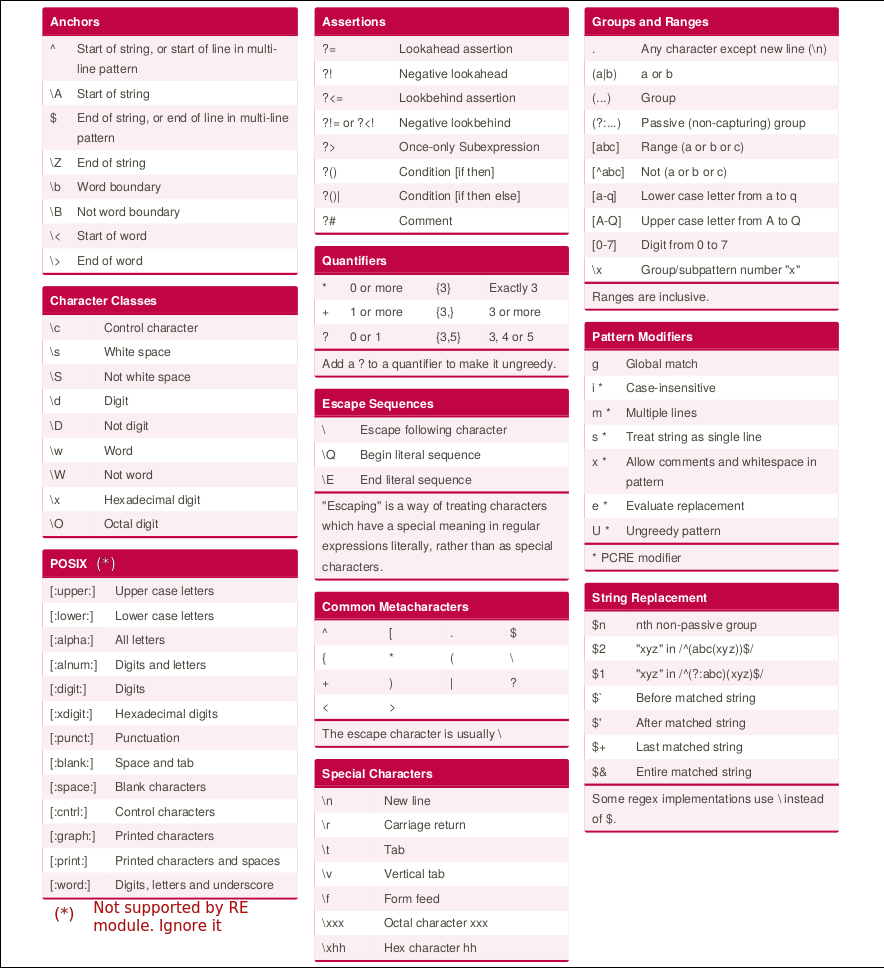

We see that RE parser has:

**Problem:** What if the text we are interested literally contains these special characters and/or special sequences that we want to match against? How to do that?

**Solution**: use

Assume that

Here we have the problem; we literally want [^abc] in the match and [^abc] is a special sequence for RE parser

In plain English, this is what happens when executing [1]:

In short, if you think that the pattern instances might contain RE parser's **special character(s)** [RE cheat sheet]
and/or **special sequences()** [RE cheat sheet], form your **literal_pattern** literally containing those and pass **literal_pattern** to re.escape() giving you the pattern you need to use in re.search() and re.findall()

A bit more advanced example:

In [1]:
text = r'hello ?=?!?!=?<! world'

Since it is a raw text, python will NOT replace escape sequences with their numeric escape sequence counterparts

Lets say that we would like to capture ?=?!?!=?<! using a capturing group. How to do that?

In [5]:
import re
pattern = re.escape('?=?!?!=?<!')   # first get the escaped pattern as regular string
pattern = 'hello (' + pattern + ') world'  # then put the pattern into a group
match = re.search(pattern, text)

match.group(1)

'?=?!?!=?<!'

## REFERENCES

[1]  https://www.youtube.com/playlist?list=PLGKQkV4guDKH1TpfM-FvPGLUyjsPGdXOg (Python Regular Expressions Made Easy)

[2] http://puremonkey2010.blogspot.com/2012/02/quick-python-6-strings-part-1.html  (raw strings)

[3] https://www.codevscolor.com/python-raw-string/  (raw strings)

[4] https://cheatography.com/davechild/cheat-sheets/regular-expressions/  (RegEx cheat sheet)

[5] https://docs.python.org/3/library/re.html (re module documentation)

[6] https://docs.python.org/3/library/re.html#re.MULTILINE

[7] https://condor.depaul.edu/sjost/lsp121/documents/ascii-npr.htm  (all Python's special characters)

[8] https://indigo.re/posts/2018-12-02-python-quoting.html

[9] https://docs.python.org/3/library/re.html#regular-expression-syntax